# Regression Analysis: Building a Multiple Linear Regression model to predict taxi fares (NYC Taxi & TLC)

## Exploratory Data Analysis 

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
from datetime import timedelta


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

In [1]:
df = df0.copy()
print(df.shape)
df.info()

NameError: name 'df0' is not defined

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [5]:
#descriptive stats
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
# Check the format of the data
df['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [7]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

#### Outliers Imputation


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

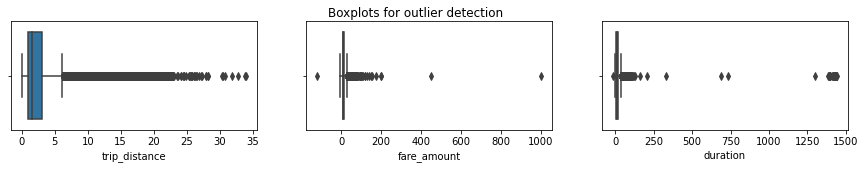

In [10]:
#Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

In [11]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [12]:
sum(df['trip_distance']==0)

148

In [13]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [14]:
# Impute -ve values with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [15]:
def outlier_imputer(column_list, iqr_factor):
  
    for col in column_list:
        #minimum to zero
        df.loc[df[col] < 0, col) = 0

        #upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        #values > threshold to threshold
        df.loc(df[col] > upper_threshold, col) = upper_threshold
        print(df[col].describe())
        print()

SyntaxError: invalid syntax (<ipython-input-15-51f017313433>, line 5)

In [16]:
outlier_imputer(['fare_amount'], 6)

NameError: name 'outlier_imputer' is not defined

In [17]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [18]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [19]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

NameError: name 'outlier_imputer' is not defined


## Feature engineering

In [20]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [21]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [22]:
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

In [23]:
# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['pickup_dropoff']
df['mean_distance'] = df['mean_distance'].map(grouped_dict)
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [24]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [25]:
#'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

#'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [27]:
#'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [28]:
# Apply `rush_hourizer()` function to new column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


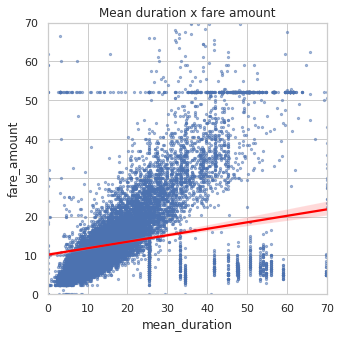

In [29]:
# Scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [30]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
59.0      9
50.5      9
57.5      8
51.0      7
Name: fare_amount, dtype: int64

In [2]:
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

NameError: name 'pd' is not defined

## Model Building

### Isolate modeling variables

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [33]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Pair plot

Pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

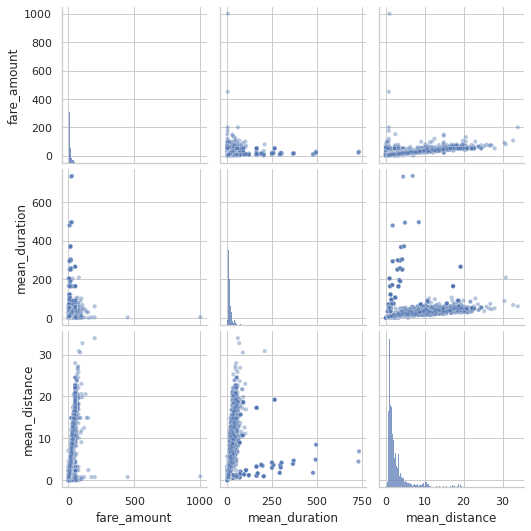

In [34]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other. Investigate this further.

### Identify correlations

In [35]:
# Correlation matrix 
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,-0.000113,0.004741,0.005384,-0.002874
passenger_count,0.266463,1.000000,0.010455,0.013428,0.007658,-0.022035
fare_amount,-0.000113,0.010455,1.000000,0.741845,0.304689,-0.016683
mean_distance,0.004741,0.013428,0.741845,1.000000,0.385917,-0.039725
mean_duration,0.005384,0.007658,0.304689,0.385917,1.000000,-0.013415
rush_hour,-0.002874,-0.022035,-0.016683,-0.039725,-0.013415,1.000000


Visualize a correlation heatmap of the data.

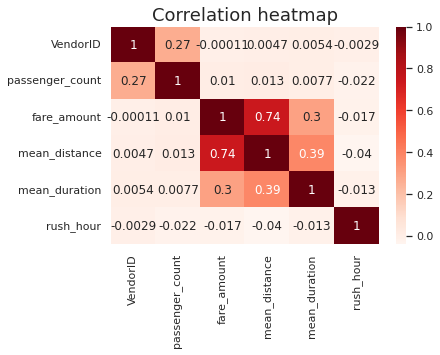

In [36]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

### Spliting & Normalizing

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [38]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [39]:
# Get dummies
X['VendorID'] = X['VendorID'].astype(str)

X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [41]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)
X_scaled 

X scaled: [[ 3.39065627  0.17093801  0.24157974 -0.64959666  0.8931955 ]
 [-0.4997803   0.05495383  0.3088076  -0.64959666 -1.11957573]
 [-0.4997803  -0.57092814 -0.40442891  1.53941679 -1.11957573]
 ...
 [-0.4997803  -0.62633441 -0.4309742  -0.64959666  0.8931955 ]
 [-0.4997803  -0.23485053 -0.01509796 -0.64959666  0.8931955 ]
 [-0.4997803  -0.40359028 -0.31514971 -0.64959666 -1.11957573]]


array([[ 3.39065627,  0.17093801,  0.24157974, -0.64959666,  0.8931955 ],
       [-0.4997803 ,  0.05495383,  0.3088076 , -0.64959666, -1.11957573],
       [-0.4997803 , -0.57092814, -0.40442891,  1.53941679, -1.11957573],
       ...,
       [-0.4997803 , -0.62633441, -0.4309742 , -0.64959666,  0.8931955 ],
       [-0.4997803 , -0.23485053, -0.01509796, -0.64959666,  0.8931955 ],
       [-0.4997803 , -0.40359028, -0.31514971, -0.64959666, -1.11957573]])


### Training & Testing

In [42]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [42]:
# Fit your model to the training data

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Evaluate performance on the training data

r_sq = lr.score(X_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.1866664167754144
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [44]:
# Evaluate performance on the testing data

r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593877
MSE: 14.326454156998947
RMSE: 3.7850302716093234


In [45]:
# Create a `results` dataframe

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


###  Evaluating results

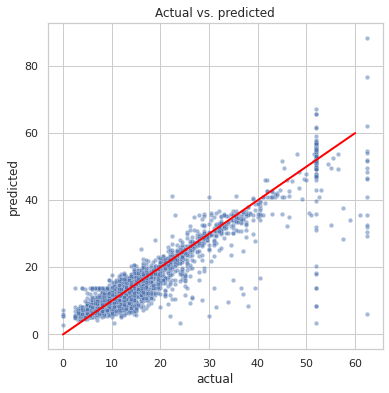

In [46]:
#Visualize `predicted` over `actual`

fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

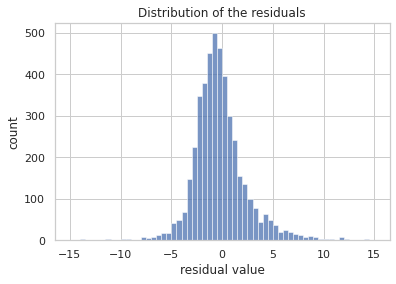

In [47]:
# Visualize the distribution of the `residuals`

sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [48]:
results['residual'].mean()

-0.015442621528681063

Create a scatterplot of `residuals` over `predicted`.

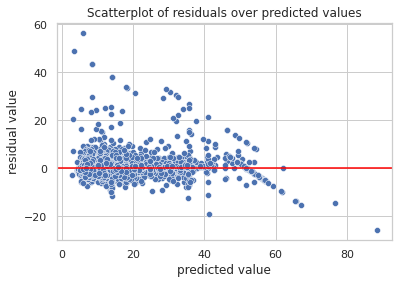

In [49]:
#scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Coefficients


In [50]:
# Model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030755,7.102335,2.806779,0.110278,-0.054376


### Predict on full dataset

In [51]:
y_preds_full = lr.predict(X_scaled)

In [52]:
# Impute a prediction of 52 at all rows where RatecodeID == 2(Business Logic)

final_preds = df[['RatecodeID']].copy()

final_preds['y_preds_full'] = y_preds_full

final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [53]:
#Model Performance on full dataset
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.9925062522699752
MSE: 12.101575504689936
RMSE: 3.4787318816905013


In [54]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
